<center>
    <h1>Hotel Booking Analysis Project</h1>
</cente>


---

This project analyzes hotel booking data to uncover patterns and insights about guest behavior, cancellations, revenue, booking trends, and more.  
The goal is to help hotel managers understand when, how, and from whom bookings come, and to identify factors that affect cancellations and revenue.

### Importing libraries:

In [76]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset:

In [78]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15


### Inspecting the Data

In [80]:
print("Shape of data:", df.shape)

Shape of data: (119390, 33)


In [81]:
print("Column names:", df.columns.tolist())

Column names: ['index', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


### Checking Missing Values

In [83]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
index                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
distribution_channel                   0
is_repeated_guest                      0
hotel                                  0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

### Remove Unnecessary Columns and Handle Missing Data

In [85]:
df.drop(['company'], axis=1, inplace=True)

In [86]:
df.drop(['agent'], axis=1, inplace=True)

In [87]:
df['children'] = df['children'].fillna(0)

In [88]:
df.drop(['days_in_waiting_list'], axis=1, inplace=True)

In [89]:
df.dtypes

index                               int64
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                      

### Fixing Data Types

In [91]:
df['children'] = df['children'].astype(int)

### Combining Year, Month and Day

In [93]:
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_day_of_month'].astype(str) + '-' +
    df['arrival_date_month'] + '-' +
    df['arrival_date_year'].astype(str),
    format='%d-%B-%Y',
    errors='coerce'
)

In [94]:
df[['arrival_date']].head()

,arrival_date
0,2015-07-01
1,2015-07-01
2,2015-07-01
3,2015-07-01
4,2015-07-01


In [95]:
df['arrival_date'].isnull().sum()

0

### Removing Duplicates

In [97]:
df.drop_duplicates(inplace=True)

In [98]:
df.reset_index(drop=True, inplace=True)

### Creating Helper Columns

**Total Nights**

In [101]:
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

**Total guests**

In [103]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']

In [104]:
df.to_csv('cleaned_hotel_booking.csv', index=False)

In [105]:
df.head()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,total_nights,total_guests
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,Transient,0.0,0,0,Check-Out,01-07-15,2015-07-01,0,2
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,Transient,0.0,0,0,Check-Out,01-07-15,2015-07-01,0,2
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,Transient,75.0,0,0,Check-Out,02-07-15,2015-07-01,1,1
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,Transient,75.0,0,0,Check-Out,02-07-15,2015-07-01,1,1
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,Transient,98.0,0,1,Check-Out,03-07-15,2015-07-01,2,2


<center>
    <h3>Exploratory Data Analysis (EDA)</h3>
</cente>


### Basic Summary

In [108]:
df.describe()

,index,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests,arrival_date,total_nights,total_guests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000
mean,59694.500000,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,...,0.031912,0.087118,0.137097,0.221124,101.831122,0.062518,0.571363,2016-08-28 16:39:45.727447808,3.427900,1.968239
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2015-07-01 00:00:00,0.000000,0.000000
25%,29847.250000,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000,2016-03-13 00:00:00,2.000000,2.000000
50%,59694.500000,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000,2016-09-06 00:00:00,3.000000,2.000000
75%,89541.750000,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-03-18 00:00:00,4.000000,2.000000
max,119389.000000,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,...,1.000000,26.000000,72.000000,21.000000,5400.000000,8.000000,5.000000,2017-08-31 00:00:00,69.000000,55.000000
std,34465.068657,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,...,0.175767,0.844336,1.497437,0.652306,50.535790,0.245291,0.792798,NaN,2.557439,0.722394


### Booking Counts by Hotel

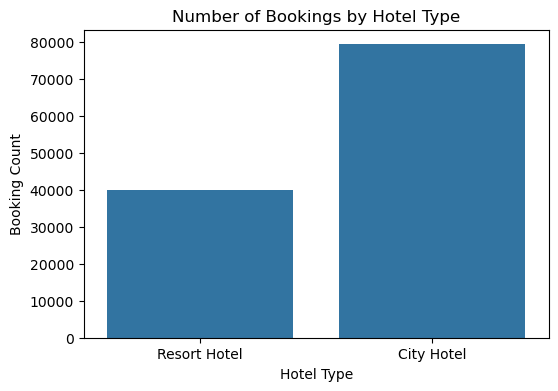

In [110]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='hotel')
plt.title('Number of Bookings by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Booking Count')

plt.show()

**Observation:**  
The chart shows that the **City Hotel** has approximately **80,000 bookings**, which is about double the bookings of the **Resort Hotel** (~40,000).  
This indicates that the City Hotel is more popular or has a higher booking capacity compared to the Resort Hotel.


### Booking Cancellation Count

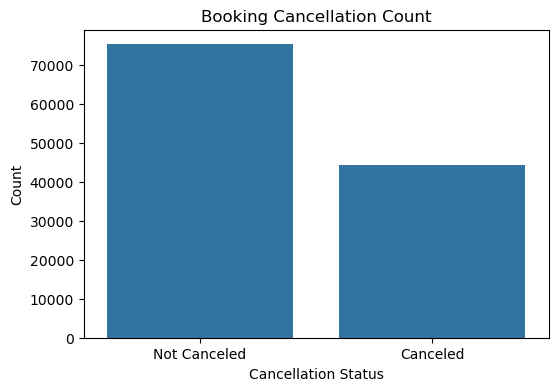

In [113]:
plt.figure(figsize=(6,4))

sns.countplot(data=df, x='is_canceled')

plt.title('Booking Cancellation Count')
plt.xlabel('Cancellation Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])

plt.show()

**Observation:**  
This chart shows that a significant portion of bookings were canceled — around **45,000** compared to about **75,000** not canceled.  
This highlights that roughly **one-third** of total bookings get canceled, which can impact revenue and resource planning.

#### Cancellation Status by Hotel Type

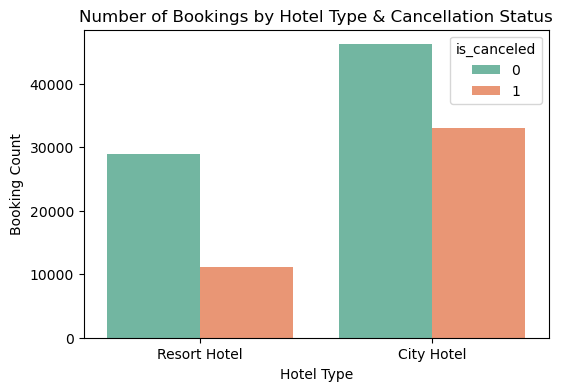

In [116]:
plt.figure(figsize=(6,4))

sns.countplot(data=df, x='hotel', hue='is_canceled', palette='Set2')

plt.title('Number of Bookings by Hotel Type & Cancellation Status')
plt.xlabel('Hotel Type')
plt.ylabel('Booking Count')

plt.show()

**Observation:**  
This plot shows the number of bookings for each hotel type, split by cancellation status.  
We can see that the **City Hotel** has a higher cancellation rate compared to the Resort Hotel.  
This suggests that guests booking City Hotels might cancel more often, which could be due to business trips, flexible plans, or other reasos.


#### 

### Bookings Trend by Month

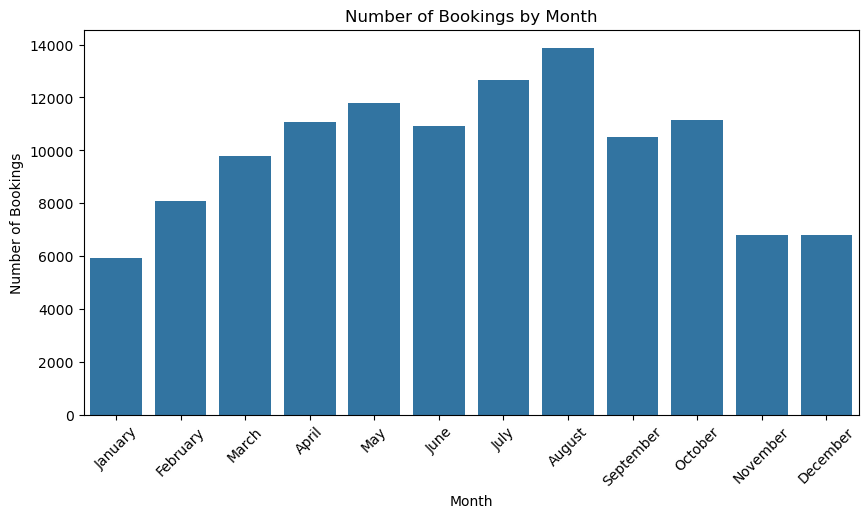

In [120]:
plt.figure(figsize=(10,5))

# Countplot by month
sns.countplot(data=df, x='arrival_date_month', order=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

plt.title('Number of Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

This chart shows the number of hotel bookings for each month of the year. It highlights seasonal booking trends, helping hotel managers understand peak and off-peak months. Such insights can guide marketing campaigns, pricing strategies, and staff planning.
Here we can see that the most booking was in **August**.

### Booking Count by Market Segment

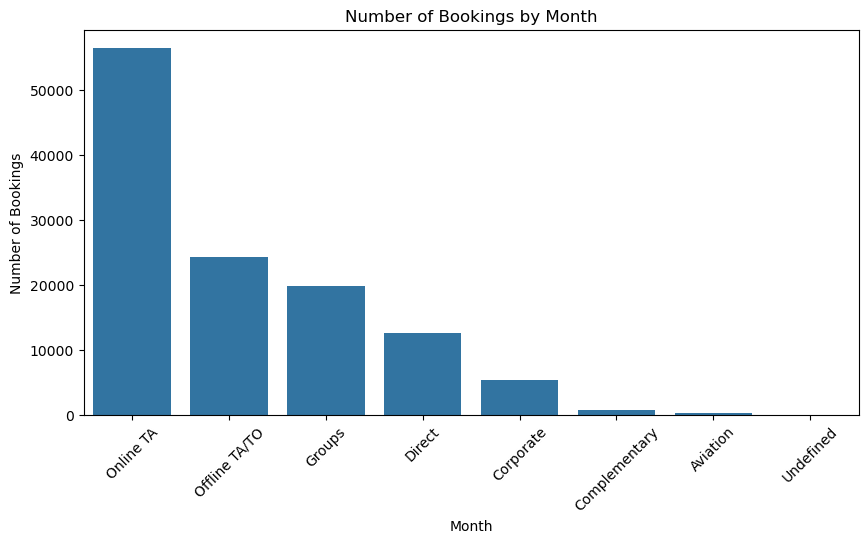

In [123]:
plt.figure(figsize=(10,5))

# Countplot by month
sns.countplot(data=df, x='market_segment',order=df['market_segment'].value_counts().index)

plt.title('Number of Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

This chart shows how bookings are distributed across different market segments. 
We can conclude that most bookings come through **Online Travel Agents**, followed by **Offline TAs** and **Groups**. It suggest that the hotel relies heavily on **online platforms** and **travel agencies** to attract guests.


### Distribution of guests by country

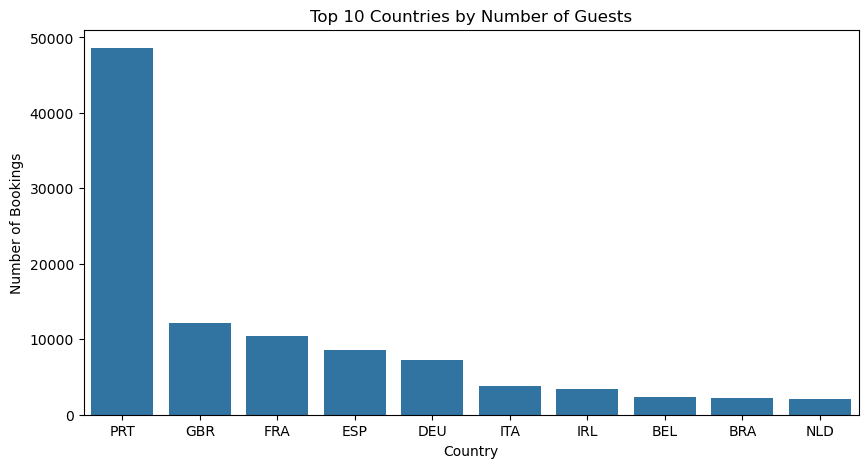

In [127]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index, y=top_countries.values)

plt.title('Top 10 Countries by Number of Guests')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.show()

This chart shows that most guests are from **Portugal**, followed by the **UK** and **France**.  
This indicates the hotels mainly serve local and nearb **European travelers.**


### Average Daily Rate (ADR) by Hotel Type

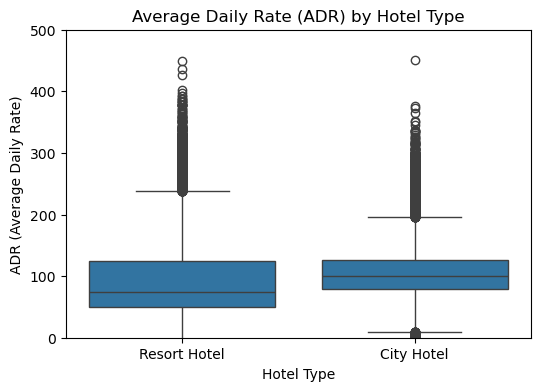

In [131]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='hotel', y='adr')

plt.title('Average Daily Rate (ADR) by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('ADR (Average Daily Rate)')
plt.ylim(0, 500)
plt.show()

 
This boxplot shows the spread of daily rates for Resort Hotels and City Hotels.  
- The box represents the middle 50% of prices (**IQR**).  
- The line inside the box shows the **median** rate.  
- Dots beyond the whiskers are **outliers**.
.


### Distribution of Total Nights Stayed

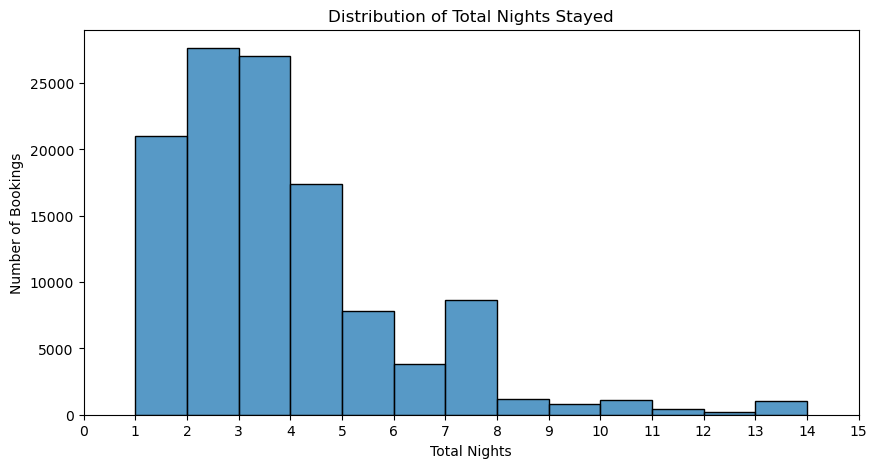

In [149]:
plt.figure(figsize=(10, 5))
sns.histplot(df['total_nights'], bins=range(1, 15), kde=False)
plt.title('Distribution of Total Nights Stayed')
plt.xlabel('Total Nights')
plt.ylabel('Number of Bookings')
plt.xlim(0, 15)

# 👇 Force X-axis ticks to show every number from 0 to 15
plt.xticks(range(0, 16))

plt.show()


The graph shows the distribution of total nights guests stayed at the hotel. The bars are highest at the lower end, indicating that most guests stay for just a few nights. As the number of nights increases, the frequency of bookings drops sharply.
 
Most guests prefer short stays, usually between 1 to 4 nights. The hotel can focus on promotions for weekend or short trips to attract more bookings. Long stays are rare and might require special offers to increase.

### Number of Bookings by Required Car Parking Spaces

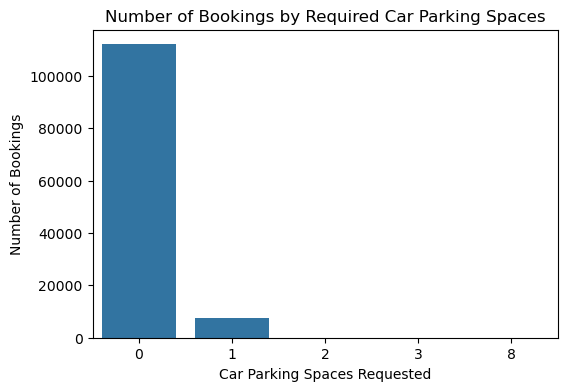

In [167]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='required_car_parking_spaces')
plt.title('Number of Bookings by Required Car Parking Spaces')
plt.xlabel('Car Parking Spaces Requested')
plt.ylabel('Number of Bookings')
plt.show()

This bar chart shows how many bookings requested car parking spaces. Most guests did not request parking, while a smaller number needed one or more spaces.

## Insights & Summary

- City Hotels have about double the bookings compared to Resort Hotels.
- Approximately one-third of bookings are canceled, which can impact revenue.
- City Hotels have a higher cancellation rate than Resort Hotels, possibly due to business or short trips.
- Peak booking months are June to August, showing strong seasonality.
- The majority of bookings come through Online Travel Agencies (OTA).
- Most guests come from Portugal, followed by the UK and France.
- Average Daily Rate (ADR) is mostly below 200 EUR, with a few high outliers.
- Parking data shows most bookings do not require parking, but a notable portion does, which is important for capacity planning.

---

## Recommendations

- Focus marketing efforts on peak months (June–August) to maximize revenue.
- Offer non-refundable deals or loyalty perks to help reduce cancellation rates, especially in City Hotels.
- Target promotions in Portugal, the UK, and France to attract the main guest base.
- Strengthen OTA partnerships, as they generate most bookings.
- Plan parking capacity according to booking trends and peak seasons.
- Investigate ADR outliers to ensure pricing accuracy.

---

## Conclusion

This EDA highlights clear booking trends, guest demographics, seasonality patterns, and key revenue factors for the hotels.  
Reducing high cancellation rates and focusing on core source markets can help improve revenue predictability.  
Future analysis could include forecasting demand, predicting cancellations, or analyzing guest satisfaction data for deeper business insightsand better decision-making.
and better decision-making.
